In [1]:
import sklearn
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
for i in [sklearn, pd, matplotlib, np, sn]:
    print(i, i.__version__)

<module 'sklearn' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/__init__.py'> 0.24.2
<module 'pandas' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/__init__.py'> 1.2.4
<module 'matplotlib' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/__init__.py'> 3.4.2
<module 'numpy' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/__init__.py'> 1.19.5
<module 'seaborn' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/__init__.py'> 0.11.1


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
topics =["abortion", "cloning", "death penalty", "gun control", "marijuana legal", "minimum wage", "nuclear energy", "school uniforms"]
seeds = ["Seed1", "Seed2", "Seed3", "Seed4", "Seed5", "Seed6", "Seed7", "Seed8", "Seed9", "Seed10"]

### Importing Data

In [5]:
df_current = pd.read_csv('BERT_Topics_score_last.csv', delimiter = ",")

### Transforming Data

In [6]:
df_current = df_current.apply(lambda x: x.str.replace(',','.'))

In [7]:
df_current = df_current.set_index(['Seed', 'Metric']).stack().rename_axis(['Seed', 'Metric', 'Topic']).reset_index(name='Value')

In [8]:
df_current["Value"] = df_current["Value"].astype(float)

In [9]:
df_current

,Seed,Metric,Topic,Value
0,Seed1,F1-avg (macroweigh),abortion,0.5320
1,Seed1,F1-avg (macroweigh),cloning,0.7067
2,Seed1,F1-avg (macroweigh),death penalty,0.5712
3,Seed1,F1-avg (macroweigh),gun control,0.5380
4,Seed1,F1-avg (macroweigh),marijuana legal,0.6002
...,...,...,...,...
635,Seed10,R no arg,gun control,79.6300
636,Seed10,R no arg,marijuana legal,91.3000
637,Seed10,R no arg,minimum wage,82.9600
638,Seed10,R no arg,nuclear energy,80.9000


### Metrics in Data

In [10]:
set(df_current["Metric"].values.tolist())

{'F1-avg (macroweigh)', 'P no arg', 'P+', 'P-', 'R no arg', 'R+', 'R-', 'acc'}

### Data with only F1 or only accuracy

In [11]:
df_current_F1 = df_current[df_current.Metric == "F1-avg (macroweigh)"]
df_current_acc = df_current[df_current.Metric == "acc"]

### Data with everything but F1

In [12]:
df_current_F1_all = df_current[df_current.Metric != "F1-avg (macroweigh)"]

### Data with all Against class Precision & Recall

In [13]:
df_negativeClass = df_current[(df_current.Metric == 'R-') | (df_current.Metric == 'P-')]

### Data with Pro Class Precision & Recall

In [14]:
df_PositiveClass = df_current[(df_current.Metric == 'R+') | (df_current.Metric == 'P+')]

### Data with Precision & recall of both Pro and Against Class

In [15]:
df_Precision_Recall = df_current[(df_current.Metric == 'R-') | (df_current.Metric == 'P-') | (df_current.Metric == 'R+') | (df_current.Metric == 'P+')]

In [16]:
df_noArg = df_current[(df_current.Metric == 'P no arg') | (df_current.Metric == 'R no arg')]
df_noArg["Class"] = "NoArgument"

## Plot 1: all metrics, all topics (too much)

In [17]:
topics =["abortion", "cloning", "death pen", "gun contr", "marijuana", "min wage", "nuclear", "school unif."]

[(0.0, 100.0)]

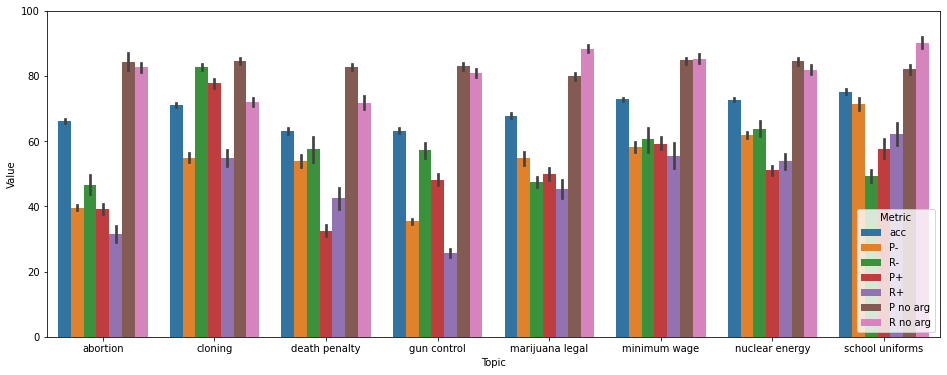

In [18]:
plt.figure(figsize=(16, 6))
ax = sn.barplot(x="Topic", hue="Metric", y="Value", data=df_current_F1_all.reset_index(),)
ax.set(ylim=(0,100))

## Plot 2: Only F1, all Topics

In [19]:
F1_SVM = pd.DataFrame([0.46, 0.59, 0.48, 0.51, 0.32,0.61, 0.60, 0.58],index=[topics]).T
F1_SVM

,abortion,cloning,death pen,gun contr,marijuana,min wage,nuclear,school unif.
0,0.46,0.59,0.48,0.51,0.32,0.61,0.6,0.58


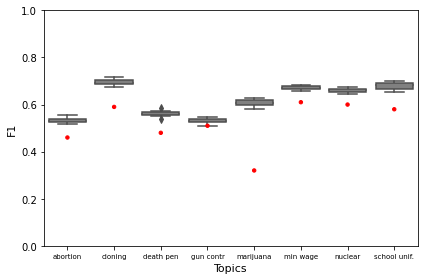

In [20]:
plt.figure(figsize=(6, 4))
sn.set_palette("bright")
          
ax = sn.boxplot(x="Topic", y="Value", zorder=0, data=df_current_F1.reset_index(),color="grey", dodge=False, linewidth=1.5)
ax.set(ylim=(0,1))

sn.pointplot(data=F1_SVM, join=False, color='red', scale=0.50)
ax.set_xticklabels(topics, fontsize=7)
plt.ylabel('F1', fontsize=11)
plt.xlabel('Topics', fontsize=11)
plt.tight_layout()
# ax.legend(['Yellow'], title='New legend')

## Plot 3: Precision & Recall of the PRO class

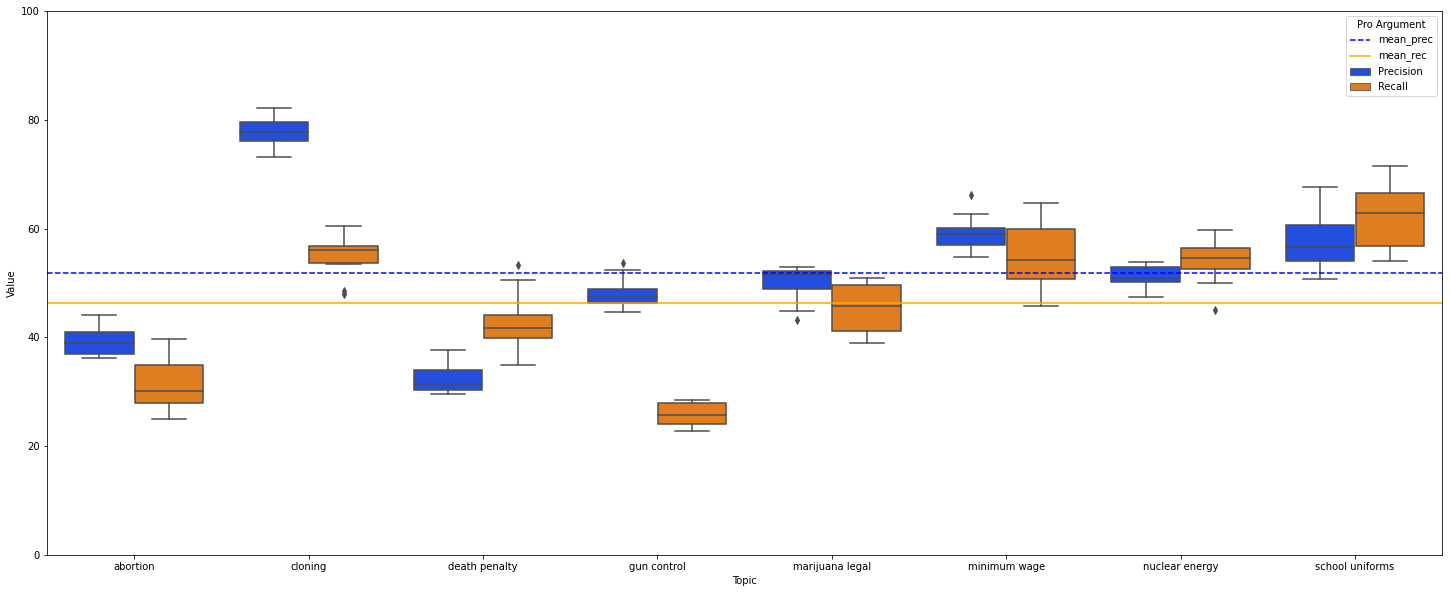

In [21]:
plt.figure(figsize=(25, 10))
ax = sn.boxplot(x="Topic", hue="Metric", y="Value", data=df_PositiveClass.reset_index(),)
ax.set(ylim=(0,100))
ax.axhline(51.9, ls="--", color="blue", label="Mean Precision")
ax.axhline(46.41, ls="-", color="orange", label="Mean Recall")
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, [ "mean_prec", "mean_rec",'Precision','Recall'], 
          bbox_to_anchor=(1,1), 
          title='Pro Argument')



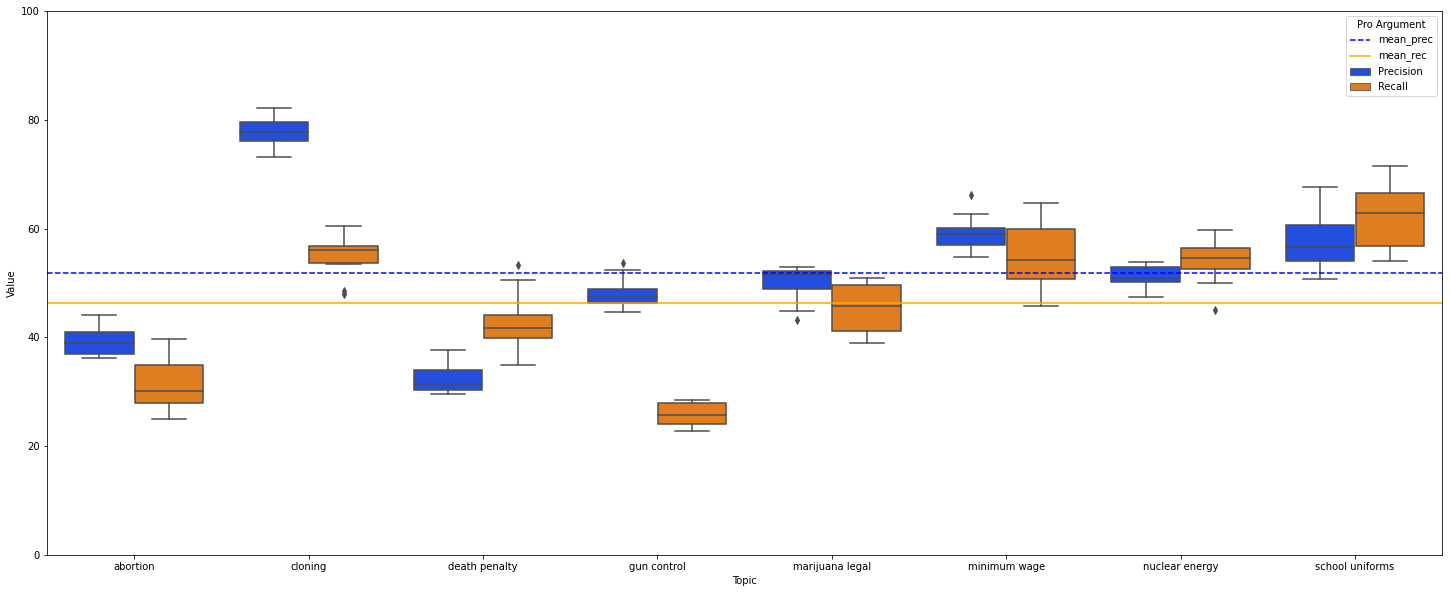

In [22]:
plt.figure(figsize=(25, 10))
ax = sn.boxplot(x="Topic", hue="Metric", y="Value", data=df_PositiveClass.reset_index(),)
ax.set(ylim=(0,100))
ax.axhline(51.9, ls="--", color="blue", label="Mean Precision")
ax.axhline(46.41, ls="-", color="orange", label="Mean Recall")
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, [ "mean_prec", "mean_rec",'Precision','Recall'], 
          bbox_to_anchor=(1,1), 
          title='Pro Argument')

### Preprocessing for joining pro and against class in one plot

In [23]:
df_Precision_Recall['Class'] = np.where( ( (df_Precision_Recall.Metric == 'P-') | (df_Precision_Recall.Metric == 'R-') ), 'Against', 'Pro')

In [24]:
df_Precision_Recall["Metric"] = df_Precision_Recall["Metric"].str.replace('[^a-zA-Z]', '')

In [25]:
df_Precision_Recall

,Seed,Metric,Topic,Value,Class
16,Seed1,P,abortion,41.44,Against
17,Seed1,P,cloning,57.56,Against
18,Seed1,P,death penalty,53.70,Against
19,Seed1,P,gun control,35.37,Against
20,Seed1,P,marijuana legal,52.17,Against
...,...,...,...,...,...
619,Seed10,R,gun control,24.05,Pro
620,Seed10,R,marijuana legal,44.07,Pro
621,Seed10,R,minimum wage,64.66,Pro
622,Seed10,R,nuclear energy,55.74,Pro


## Plot 4: Pro and Against Class, Precision and Recall, in one figure

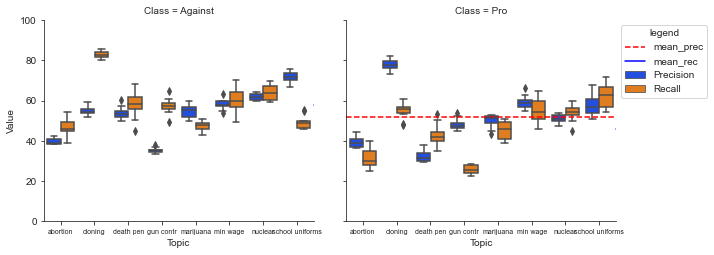

In [26]:
topics =["abortion", "cloning", "death pen", "gun contr", "marijuana", "min wage", "nuclear", "school uniforms"]

sn.set_style('ticks')
ax = sn.catplot(x="Topic", kind="box", hue="Metric", y="Value", col="Class", ci="sd", legend=False, height=3.5, aspect=1.25, data=df_Precision_Recall.reset_index(),)
ax.set(ylim=(0,100))
ax1, ax2 = ax.axes[0]
ax2.axhline(51.9, ls="--", color="red", label="Mean Precision")
ax2.axhline(46,41, ls="-", color="blue", label="Mean Recall")

ax1.axhline(53,76, ls="--", color="red", label="Mean Precision")
ax1.axhline(58,13, ls="-", color="blue", label="Mean Recall")

ax.set_xticklabels(topics, fontsize=7)

legend_labels, _= ax2.get_legend_handles_labels()
ax2.legend(legend_labels, [ "mean_prec", "mean_rec",'Precision','Recall'], 
          bbox_to_anchor=(1,1), 
          title='legend')

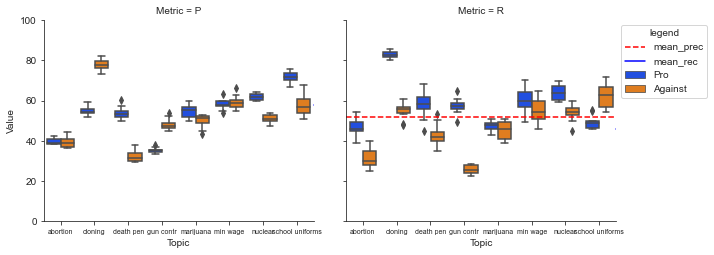

In [27]:
topics =["abortion", "cloning", "death pen", "gun contr", "marijuana", "min wage", "nuclear", "school uniforms"]

sn.set_style('ticks')
ax = sn.catplot(x="Topic", kind="box", hue="Class", y="Value", col="Metric", ci="sd", legend=False, height=3.5, aspect=1.25, data=df_Precision_Recall.reset_index(),)
ax.set(ylim=(0,100))
ax1, ax2 = ax.axes[0]
ax2.axhline(51.9, ls="--", color="red", label="Mean Precision")
ax2.axhline(46,41, ls="-", color="blue", label="Mean Recall")

ax1.axhline(53,76, ls="--", color="red", label="Mean Precision")
ax1.axhline(58,13, ls="-", color="blue", label="Mean Recall")

ax.set_xticklabels(topics, fontsize=7)

legend_labels, _= ax2.get_legend_handles_labels()
ax2.legend(legend_labels, [ "mean_prec", "mean_rec",'Pro','Against'], 
          bbox_to_anchor=(1,1), 
          title='legend')

## Plot 5: adding no argument class

In [28]:
df_threeclass = pd.concat([df_Precision_Recall, df_noArg])

In [29]:
df_threeclass["Metric"] = df_threeclass["Metric"].str.replace("no arg", "")
df_threeclass["Metric"] = df_threeclass["Metric"].str.replace(" ", "")

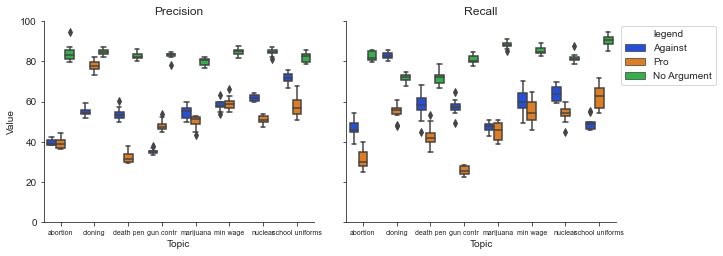

In [30]:
topics =["abortion", "cloning", "death pen", "gun contr", "marijuana", "min wage", "nuclear", "school uniforms"]

sn.set_style('ticks')
ax = sn.catplot(x="Topic", kind="box", hue="Class", y="Value", col="Metric", ci="sd", legend=False, height=3.5, aspect=1.25, data=df_threeclass,)
ax.set(ylim=(0,100))
ax1, ax2 = ax.axes[0]
# ax2.axhline(51.9, ls="--", color="red", label="Mean Precision")
# ax2.axhline(46,41, ls="-", color="blue", label="Mean Recall")

# ax1.axhline(53,76, ls="--", color="red", label="Mean Precision")
# ax1.axhline(58,13, ls="-", color="blue", label="Mean Recall")
ax1.set_title("Precision")
ax2.set_title("Recall")

ax.set_xticklabels(topics, fontsize=7)

legend_labels, _= ax2.get_legend_handles_labels()
ax2.legend(legend_labels, [ "Against", "Pro",'No Argument'], 
          bbox_to_anchor=(1,1), 
          title='legend')

### in-class F1

In [31]:
df_threeclass = df_threeclass.set_index(['Topic', 'Seed', 'Class'])

In [32]:
from scipy.stats.mstats import hmean
df_threeclass["mean_class"] = df_threeclass.groupby(['Topic', 'Seed', 'Class'])["Value"].apply(hmean)

In [33]:
df_Precision_Recall = df_Precision_Recall.set_index(['Topic', 'Seed', 'Class'])

In [34]:
from scipy.stats.mstats import hmean
df_Precision_Recall["mean_class"] = df_Precision_Recall.groupby(['Topic', 'Seed', 'Class'])["Value"].apply(hmean)

In [35]:
df_Precision_Recall.reset_index()

,Topic,Seed,Class,Metric,Value,mean_class
0,abortion,Seed1,Against,P,41.44,43.352469
1,cloning,Seed1,Against,P,57.56,67.486421
2,death penalty,Seed1,Against,P,53.70,57.766781
3,gun control,Seed1,Against,P,35.37,44.749829
4,marijuana legal,Seed1,Against,P,52.17,49.791270
...,...,...,...,...,...,...
315,gun control,Seed10,Pro,R,24.05,31.276193
316,marijuana legal,Seed10,Pro,R,44.07,47.707713
317,minimum wage,Seed10,Pro,R,64.66,60.487014
318,nuclear energy,Seed10,Pro,R,55.74,51.908576


In [36]:
df_threeclass

,,,Metric,Value,mean_class
Topic,Seed,Class,,,
abortion,Seed1,Against,P,41.44,43.352469
cloning,Seed1,Against,P,57.56,67.486421
death penalty,Seed1,Against,P,53.70,57.766781
gun control,Seed1,Against,P,35.37,44.749829
marijuana legal,Seed1,Against,P,52.17,49.791270
...,...,...,...,...,...
gun control,Seed10,NoArgument,R,79.63,81.241705
marijuana legal,Seed10,NoArgument,R,91.30,84.307564
minimum wage,Seed10,NoArgument,R,82.96,85.169541


In [37]:
# plt.figure(figsize=(10, 8))
# topics =["abortion", "cloning", "death pen", "gun contr", "marijuana", "min wage", "nuclear", "school uniforms"]

# sn.set_style('ticks')
# ax = sn.catplot(x="Topic", kind="box", hue="Class", y="mean_class", ci="sd", height=15, aspect=3, data=df_threeclass.reset_index(),)
# ax.set(ylim=(0,100))
# # ax1, ax2 = ax.axes[0]
# # # ax2.axhline(51.9, ls="--", color="red", label="Mean Precision")
# # # ax2.axhline(46,41, ls="-", color="blue", label="Mean Recall")

# # # ax1.axhline(53,76, ls="--", color="red", label="Mean Precision")
# # # ax1.axhline(58,13, ls="-", color="blue", label="Mean Recall")
# # ax1.set_title("Precision")
# # ax2.set_title("Recall")
# plt.tick_params(axis='x', which='major')
# ax.set_xticklabels(topics, fontsize=7)
# plt.ylabel('In-class F1', fontsize=11)
# plt.xlabel('Topics', fontsize=11)
# # legend_labels, _= ax.get_legend_handles_labels()
# # ax.legend([ "Against", "Pro",'No Argument'], 
# #           bbox_to_anchor=(1,1), 
# #           title='legend')

In [38]:
df_current_F1["Class"] = "All"

In [39]:
df_current_F1["mean_class"] = df_current_F1["Value"] * 100

In [40]:
df_current_F1

,Seed,Metric,Topic,Value,Class,mean_class
0,Seed1,F1-avg (macroweigh),abortion,0.5320,All,53.20
1,Seed1,F1-avg (macroweigh),cloning,0.7067,All,70.67
2,Seed1,F1-avg (macroweigh),death penalty,0.5712,All,57.12
3,Seed1,F1-avg (macroweigh),gun control,0.5380,All,53.80
4,Seed1,F1-avg (macroweigh),marijuana legal,0.6002,All,60.02
...,...,...,...,...,...,...
579,Seed10,F1-avg (macroweigh),gun control,0.5182,All,51.82
580,Seed10,F1-avg (macroweigh),marijuana legal,0.6184,All,61.84
581,Seed10,F1-avg (macroweigh),minimum wage,0.6764,All,67.64
582,Seed10,F1-avg (macroweigh),nuclear energy,0.6476,All,64.76


In [41]:
df_threeclass = df_threeclass.reset_index()

In [42]:
df_threeclass["Class"]

0         Against
1         Against
2         Against
3         Against
4         Against
          ...    
475    NoArgument
476    NoArgument
477    NoArgument
478    NoArgument
479    NoArgument
Name: Class, Length: 480, dtype: object

In [43]:
df_fourclass = pd.concat([df_threeclass, df_current_F1])

In [44]:
df_fourclass["Class"].value_counts()

Pro           160
NoArgument    160
Against       160
All            80
Name: Class, dtype: int64

In [45]:
df_fourclass

,Topic,Seed,Class,Metric,Value,mean_class
0,abortion,Seed1,Against,P,41.4400,43.352469
1,cloning,Seed1,Against,P,57.5600,67.486421
2,death penalty,Seed1,Against,P,53.7000,57.766781
3,gun control,Seed1,Against,P,35.3700,44.749829
4,marijuana legal,Seed1,Against,P,52.1700,49.791270
...,...,...,...,...,...,...
579,gun control,Seed10,All,F1-avg (macroweigh),0.5182,51.820000
580,marijuana legal,Seed10,All,F1-avg (macroweigh),0.6184,61.840000
581,minimum wage,Seed10,All,F1-avg (macroweigh),0.6764,67.640000
582,nuclear energy,Seed10,All,F1-avg (macroweigh),0.6476,64.760000


In [46]:
df_fourclass

,Topic,Seed,Class,Metric,Value,mean_class
0,abortion,Seed1,Against,P,41.4400,43.352469
1,cloning,Seed1,Against,P,57.5600,67.486421
2,death penalty,Seed1,Against,P,53.7000,57.766781
3,gun control,Seed1,Against,P,35.3700,44.749829
4,marijuana legal,Seed1,Against,P,52.1700,49.791270
...,...,...,...,...,...,...
579,gun control,Seed10,All,F1-avg (macroweigh),0.5182,51.820000
580,marijuana legal,Seed10,All,F1-avg (macroweigh),0.6184,61.840000
581,minimum wage,Seed10,All,F1-avg (macroweigh),0.6764,67.640000
582,nuclear energy,Seed10,All,F1-avg (macroweigh),0.6476,64.760000


In [47]:
F1_SVM = pd.DataFrame([0.46, 0.59, 0.48, 0.51, 0.32,0.61, 0.60, 0.58],[topics])
F1_SVM = F1_SVM * 100 
F1_SVM["Class"] = "All"
F1_SVM = F1_SVM.T
F1_SVM = F1_SVM.rename(index={F1_SVM.index[0]: "mean_class"})
F1_SVM = F1_SVM.T
F1_SVM.reset_index(level=0, inplace=True)
F1_SVM["Topic"] = F1_SVM["level_0"]
F1_SVM

,level_0,mean_class,Class,Topic
0,abortion,46.0,All,abortion
1,cloning,59.0,All,cloning
2,death pen,48.0,All,death pen
3,gun contr,51.0,All,gun contr
4,marijuana,32.0,All,marijuana
5,min wage,61.0,All,min wage
6,nuclear,60.0,All,nuclear
7,school uniforms,58.0,All,school uniforms


<AxesSubplot:xlabel='Topic', ylabel='mean_class'>

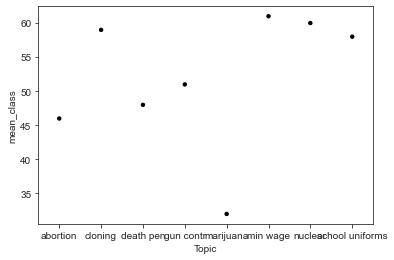

In [48]:
sn.pointplot(data=F1_SVM, y='mean_class', x='Topic', color='black', scale=0.50, join=False)

8


<Figure size 1800x1080 with 0 Axes>

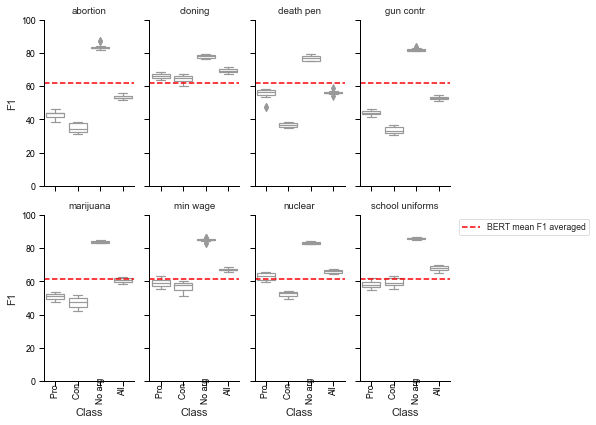

In [49]:
import seaborn as sn
import matplotlib 
SVM_F1 = [0.46, 0.59, 0.48, 0.51, 0.32,0.61, 0.60, 0.58]
BERT_F1 = [0.53342, 0.69353, 0.56194, 0.53034, 0.6068, 0.67013, 0.66053, 0.67831]

plt.figure(figsize=(25, 15))
sn.set_style('white')
sn.set_context('paper')
sn.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})

g = sn.catplot(x="Class", kind="box", col="Topic", col_wrap=4, y="mean_class", ci="sd", legend_out=True, height=3, aspect=.7, data=df_fourclass, palette=['white'])

# g = g.map(sn.pointplot(data=F1_SVM, join=False, color='red', scale=0.50))
g.set(ylim=(0,100))

# plt.tick_params(axis='y', which='major', labelsize=3, length=2, pad=-5)
g.set_xticklabels(["Pro ", "Con ", "No arg ", "All "], rotation=90, va="center")
g.set_ylabels('F1', fontsize=11)
g.set_xlabels('Class', fontsize=11)
#g.set_titles("abortion", "cloning", "death penalty", "gun control", "marijuana legal", "minimum wage", "nuclear energy", "school uniforms")

axes = g.axes.flatten()
print(len(axes))
for ax in axes:
    ax.axhline(61.69, ls='--', linewidth=1.5, color='red', label="BERT mean F1 averaged")
    
for n in range(0, 8):
    #axes[n].axhline(BERT_F1[n] * 100, ls='-.', dash_capstyle='round', marker='v', color='orange', label="BERT model F1 on topic")
    #axes[n].axhline(SVM_F1[n] * 100, ls=':', dash_capstyle='round', color='blue', label="SVM model F1 on topic")
    axes[n].set_title(topics[n])
    
    
#axes[0].axhline(46, ls='-', dash_capstyle='round', color='blue', label="SVM model topic F1")
# axes[0].set_title("abortion")


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Topic_boxplot.png")

8


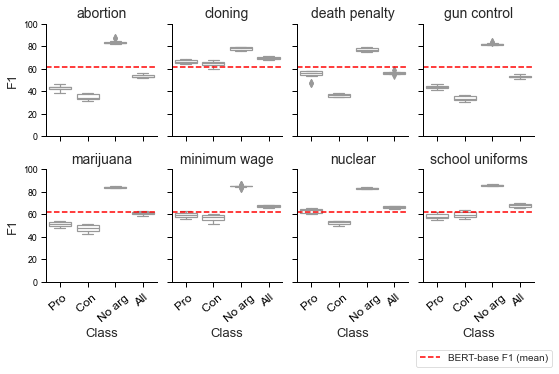

In [50]:

topics =["abortion", "cloning", "death penalty", "gun control", "marijuana", "minimum wage", "nuclear", "school uniforms"]

# plt.figure(figsize=(50, 30))
sn.set_style('white')
sn.set_context('paper')
sn.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})

g = sn.catplot(x="Class", kind="box", col="Topic", col_wrap=4, y="mean_class", ci="sd", legend_out=True, height=3, aspect=.65, data=df_fourclass, palette=['white'])

g.set(ylim=(0,100))

g.set_xticklabels(["Pro ", "Con ", "No arg ", "All "], rotation=40, va="top", fontsize=12)
g.set_ylabels('F1', fontsize=13)
g.set_xlabels('Class', fontsize=13)

axes = g.axes.flatten()
print(len(axes))
for ax in axes:
    ax.axhline(61.69, ls='--', linewidth=1.5, color='red', label="BERT-base F1 (mean)")
    
for n in range(0, 8):
    axes[n].set_title(topics[n], fontsize=14)
    
plt.legend(bbox_to_anchor=(.55, -.80), loc='lower center', fontsize=10)
plt.tight_layout()

image_format = 'pdf' 
image_name = 'test_PDF_9.pdf'

plt.savefig(image_name, format=image_format, dpi=1200)

## Plot 4: F1 of classes

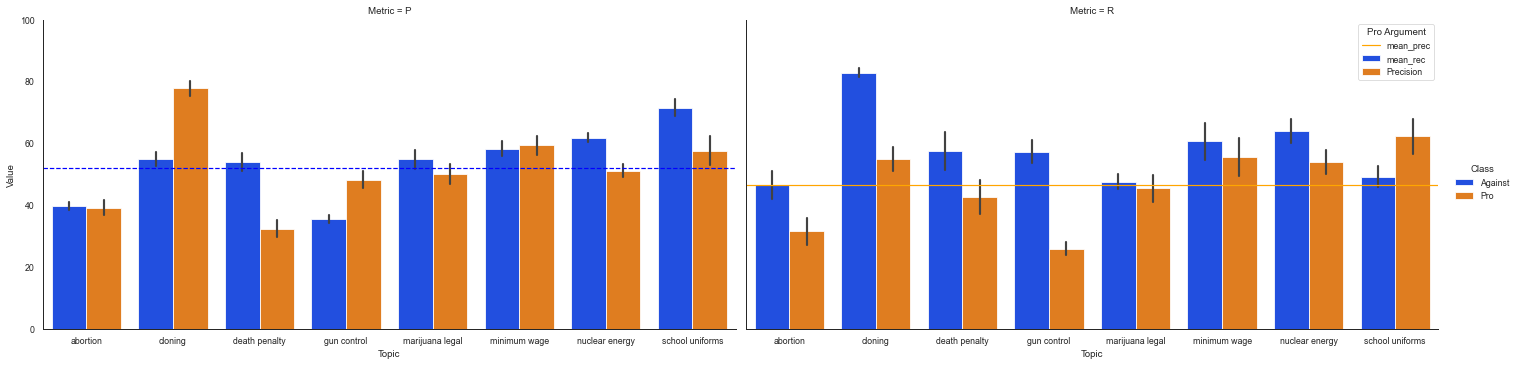

In [52]:
# plt.figure(figsize=(50, 20))
sn.set_style('white')
ax = sn.catplot(x="Topic", kind="bar", hue="Class", y="Value", col="Metric", ci="sd", height=5, aspect=2, data=df_Precision_Recall.reset_index(),)
ax.set(ylim=(0,100))
ax1, ax2 = ax.axes[0]
ax1.axhline(51.9, ls="--", color="blue", label="Mean Precision")
ax2.axhline(46.41, ls="-", color="orange", label="Mean Recall")
legend_labels, _= ax2.get_legend_handles_labels()
ax2.legend(legend_labels, [ "mean_prec", "mean_rec",'Precision','Recall'], 
          bbox_to_anchor=(1,1), 
          title='Pro Argument')

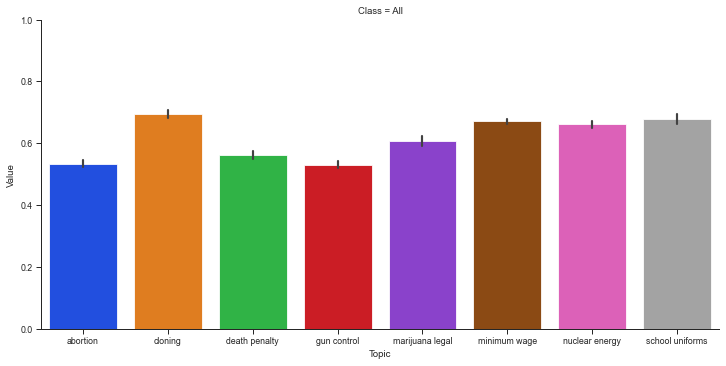

In [53]:
# plt.figure(figsize=(50, 20))
sn.set_style('ticks')
ax = sn.catplot(x="Topic", kind="bar", y="Value", col="Class", ci="sd", height=5, aspect=2, data=df_current_F1.reset_index(),)

ax.set(ylim=(0,1))
# ax1, ax2 = ax.axes[0]
# ax2.axhline(51.9, ls="--", color="red", label="Mean Precision")
# ax2.axhline(46,41, ls="-", color="blue", label="Mean Recall")

# ax1.axhline(53,76, ls="--", color="red", label="Mean Precision")
# # ax1.axhline(58,13, ls="-", color="blue", label="Mean Recall")
# legend_labels, _= ax2.get_legend_handles_labels()
# ax2.legend(legend_labels, [ "mean_prec", "mean_rec",'Precision','Recall'], 
#           bbox_to_anchor=(1,1), 
#           title='legend')

## Plot 5: Precision and Recall of the Against Class

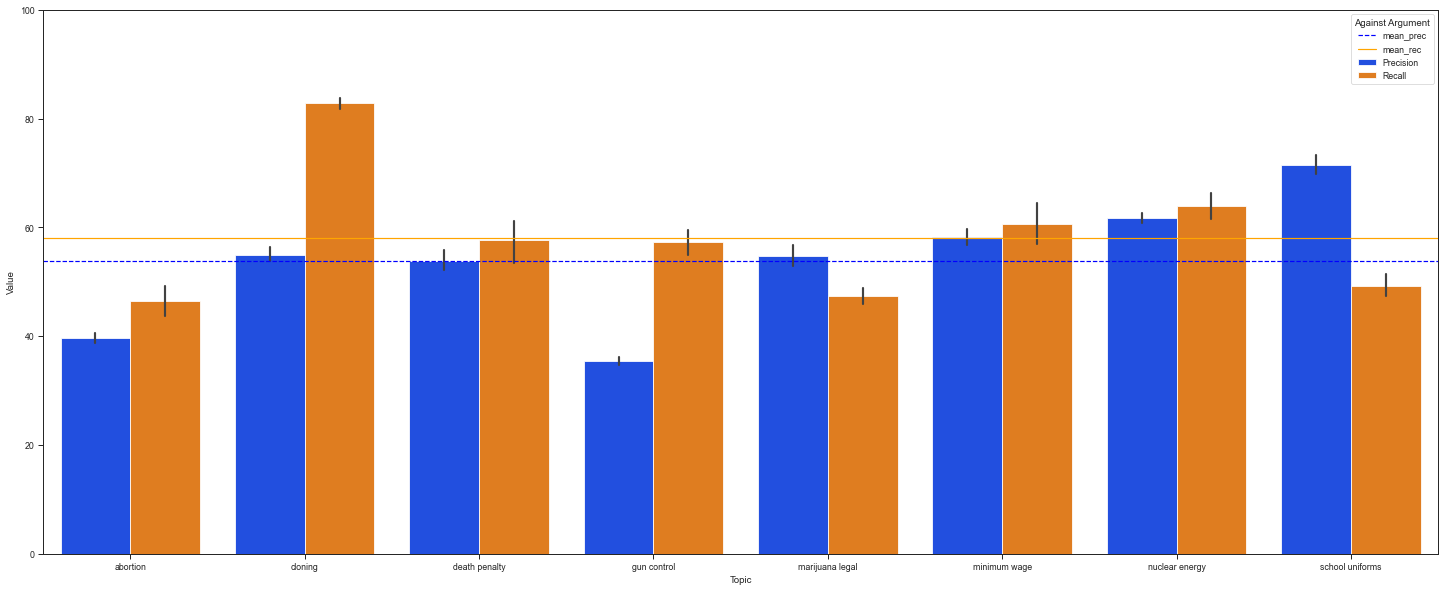

In [54]:
plt.figure(figsize=(25, 10))
ax = sn.barplot(x="Topic", hue="Metric", y="Value", data=df_negativeClass.reset_index(),)
ax.set(ylim=(0,100))
ax.axhline(53.76, ls="--", color="blue", label="Mean Precision")
ax.axhline(58.13, ls="-", color="orange", label="Mean Recall")
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, [ "mean_prec", "mean_rec",'Precision','Recall'], 
          bbox_to_anchor=(1,1), 
          title='Against Argument')